## Imports and General Information

Dataset: ILINet.csv  
Output / classifier: %UNWEIGHTED ILI

In [ ]:
# Imports: General
import pandas as pd  # Used for dataframes and to read in csv
import numpy as np  # Used for math
import matplotlib.pyplot as plt  # Used for plots

# Imports: Random Forest
from sklearn.ensemble import RandomForestRegressor  # Used to activate random forest regression
from sklearn.model_selection import train_test_split  # Used to split training and testing data
from sklearn.metrics import mean_squared_error  # Used to display mean squared error to evaluate our model
from sklearn.tree import plot_tree  # Used to create a visual tree for random forest
from sklearn.model_selection import GridSearchCV  # Used to tune the random forest model's parameters

## Data Cleansing

Read in CSV file "ILINet.csv"

In [ ]:
ILINet = pd.read_csv("ILINet.csv")
ILINet.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,2010,40,1.10939,1.13505,2627,1677,X,3142,627,400,8473,1838,746485
1,National,X,2010,41,1.24341,1.25256,2953,1779,X,3522,649,444,9347,1875,746230
2,National,X,2010,42,1.25726,1.24570,3044,1898,X,3641,690,411,9684,1907,777397
3,National,X,2010,43,1.25734,1.26774,3226,1754,X,3822,682,420,9904,1929,781234
4,National,X,2010,44,1.43414,1.43723,3451,1981,X,4397,736,455,11020,1947,766753


Remove the columns that are all Xs (NAs), as well as any rows that are NA

In [ ]:
# Remove all X columns ("REGION" and "AGE 25-64")
ILINet = ILINet.drop(columns = ["REGION", "AGE 25-64"])

# Remove all rows with Xs
ILINet = ILINet[ILINet != "X"]

# Remove "REGION TYPE" since it's only filled with "National"
ILINet = ILINet.drop(columns = ["REGION TYPE"])

In [ ]:
ILINet.head()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2010,40,1.10939,1.13505,2627,1677,3142,627,400,8473,1838,746485
1,2010,41,1.24341,1.25256,2953,1779,3522,649,444,9347,1875,746230
2,2010,42,1.25726,1.24570,3044,1898,3641,690,411,9684,1907,777397
3,2010,43,1.25734,1.26774,3226,1754,3822,682,420,9904,1929,781234
4,2010,44,1.43414,1.43723,3451,1981,4397,736,455,11020,1947,766753


Split the data into X (predictors) and y (target)

X: Everything except "%UNWEIGHTED ILI"  
y: "%UNWEIGHTED ILI"

In [ ]:
X = ILINet.drop(columns = ["%UNWEIGHTED ILI"])
y = ILINet["%UNWEIGHTED ILI"]

Split the data into training and testing data for our regressor model

The most recent 20% of years should be testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(624, 11)
(157, 11)
(624,)
(157,)


,YEAR,WEEK,% WEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,2010,40,1.10939,2627,1677,3142,627,400,8473,1838,746485
1,2010,41,1.24341,2953,1779,3522,649,444,9347,1875,746230
2,2010,42,1.25726,3044,1898,3641,690,411,9684,1907,777397
3,2010,43,1.25734,3226,1754,3822,682,420,9904,1929,781234
4,2010,44,1.43414,3451,1981,4397,736,455,11020,1947,766753


## Random Forest Regressor


Use GridSearchCV to find the optimal parameters for the upcoming Random Forest shell/model

**NOTE**: This takes a ridiculously long time

In [ ]:
# Set up the parameter grid for GridSearchCV
# It will try every combination of these values to find the best one
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5]
    #'min_samples_leaf': [1, 2],
    #'bootstrap': [True, False]
}

# Create the grid search shell
grid_search = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, cv = 5)

# Fit the grid search to our training input (X) and output (y)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

Display the best parameters from the resultant GridSearchCV program

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Create random forest model shell, then train the model using our data, then predict our testing data using the model

By tuning the model using the best parameters and estimator found above, we can optimize the model beyond using just the default parameters

In [ ]:
RandomForest = RandomForestRegressor(random_state = 123,
                                     max_depth = 20,
                                     min_samples_split = 5,
                                     n_estimators = 50)

Train, or fit, our model using `X_train` and `y_train`

In [ ]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=50,
                      random_state=123)

Now that our model is fitted, we use our model on our `X_test` data and see its results

In [ ]:
y_prediction = RandomForest.predict(X_test)
y_prediction

array([2.26529824, 2.3470107 , 2.6023191 , 3.01904265, 3.30899363,
       4.53739906, 5.46339489, 5.94680497, 6.25865559, 7.54552874,
       7.24662345, 7.18093537, 7.01620704, 6.35509281, 5.54728232,
       4.1197843 , 2.99344568, 2.67691174, 2.64835212, 2.57449907,
       2.56854297, 2.57548017, 2.57931464, 2.50639891, 2.3800757 ,
       2.39614322, 2.25361465, 2.21981215, 2.20237736, 2.00425475,
       1.9113375 , 1.9113375 , 1.90993218, 1.91825077, 1.87708875,
       1.79237214, 1.78683554, 1.50121095, 1.43109008, 1.3732808 ,
       1.31172215, 1.24705266, 1.16030078, 1.13608257, 1.19024571,
       1.23919393, 1.31507175, 1.37382087, 1.69772276, 1.91894718,
       2.00740302, 1.9204113 , 2.02715199, 2.02545693, 2.26604308,
       2.39481899, 2.57961104, 2.75375393, 3.02451448, 3.45923951,
       3.54107218, 4.11261037, 4.17762946, 4.55777859, 5.46674254,
       6.47734002, 7.18093537, 5.97038497, 4.92287112, 4.59921067,
       4.24303254, 4.57533138, 4.57206096, 4.57358791, 4.57141

`y_predict` is our model's prediction of what the `y_test` values should be, given our `X_train` and `y_train`

Use mean squared error to evaluate our model, and determine how accurate it is

## Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_prediction)
mse

rmse = np.sqrt(mse)
mse, rmse

(0.025559016711107944, np.float64(0.15987187592290253))

With an MSE of `0.1599`, that means our model's predictions are - on average - 0.0258 units off from the true values

In the context of our model, that means it predicts "%UNWEIGHTED ILI" percentages that are on average 0.1599% off

Visualize the decision tree the random forest regressor came up with

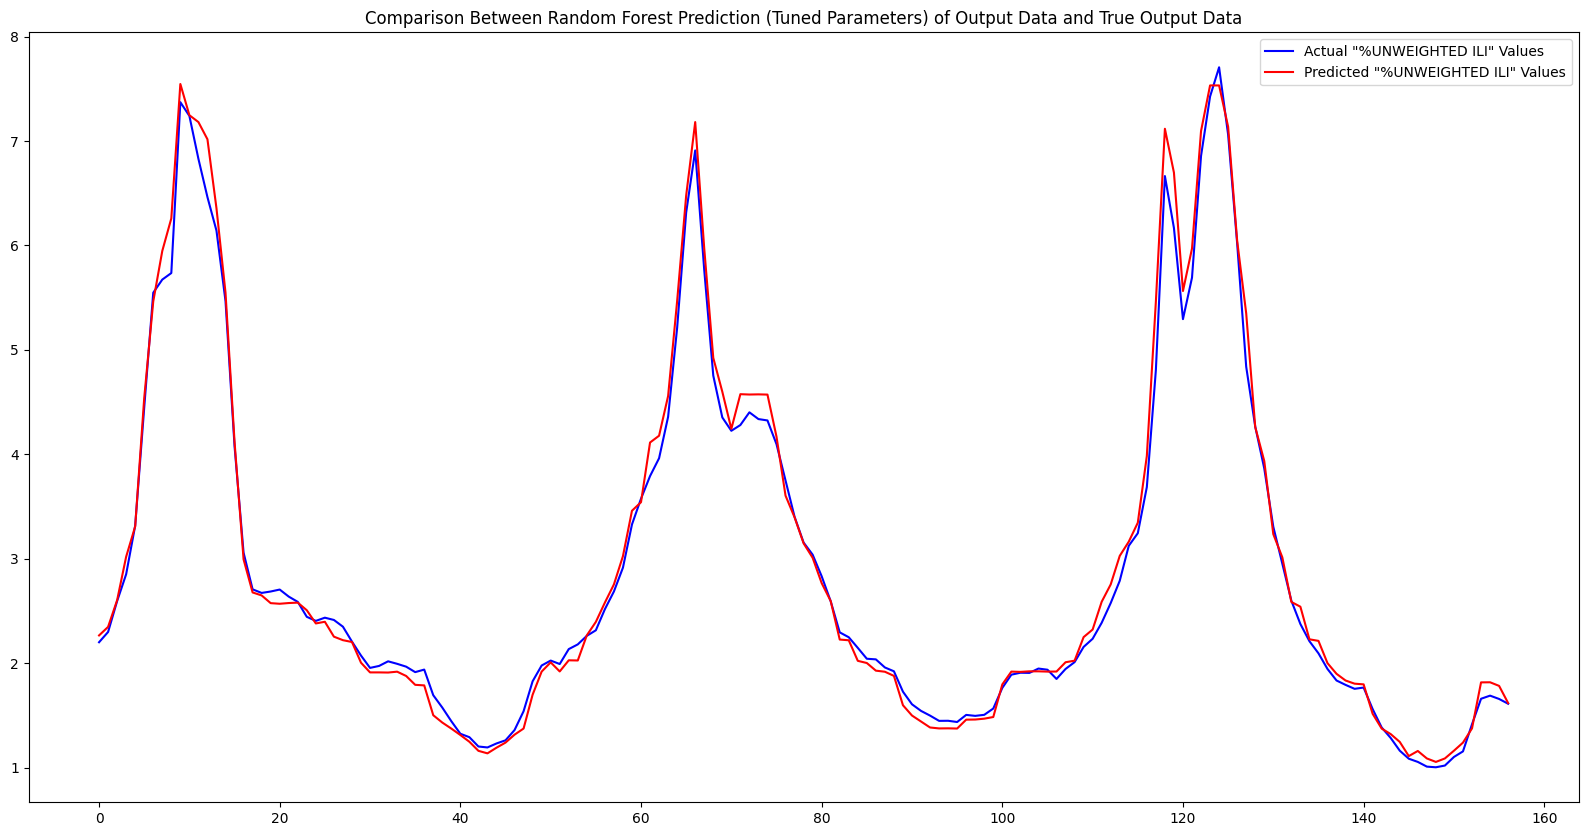

In [ ]:
# Create x and y axes for line graph for "y_test"
x_axis = np.arange(len(y_test))
y_axis = y_test

plt.figure(figsize = (20, 10))  # Make window larger

# Create a line plot for the "y_test"
plt.plot(x_axis, y_axis, color = "blue", label = 'Actual "%UNWEIGHTED ILI" Values')

# Create x and y axes for line graph for "y_prediction"
x_axis = np.arange(len(y_prediction))
y_axis = y_prediction

# Add a line for the "y_prediction" onto the graph
plt.plot(x_axis, y_axis, color = "red", label = 'Predicted "%UNWEIGHTED ILI" Values')

plt.legend()  # Display legend
plt.title("Comparison Between Random Forest Prediction (Tuned Parameters) of Output Data and True Output Data")  # Display title


# Display line plot
plt.show()